In [74]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [75]:
print(tf.__version__)
print(tf.__all__)

1.12.0
['AUTO_REUSE', 'AggregationMethod', 'Assert', 'AttrValue', 'COMPILER_VERSION', 'CXX11_ABI_FLAG', 'ConditionalAccumulator', 'ConditionalAccumulatorBase', 'ConfigProto', 'DType', 'DeviceSpec', 'Dimension', 'Event', 'FIFOQueue', 'FixedLenFeature', 'FixedLenSequenceFeature', 'FixedLengthRecordReader', 'GIT_VERSION', 'GPUOptions', 'GRAPH_DEF_VERSION', 'GRAPH_DEF_VERSION_MIN_CONSUMER', 'GRAPH_DEF_VERSION_MIN_PRODUCER', 'GradientTape', 'Graph', 'GraphDef', 'GraphKeys', 'GraphOptions', 'HistogramProto', 'IdentityReader', 'IndexedSlices', 'InteractiveSession', 'LMDBReader', 'LogMessage', 'MONOLITHIC_BUILD', 'MetaGraphDef', 'NameAttrList', 'NoGradient', 'NodeDef', 'NotDifferentiable', 'OpError', 'Operation', 'OptimizerOptions', 'PaddingFIFOQueue', 'Print', 'PriorityQueue', 'QUANTIZED_DTYPES', 'QueueBase', 'RandomShuffleQueue', 'ReaderBase', 'RegisterGradient', 'RunMetadata', 'RunOptions', 'Session', 'SessionLog', 'SparseConditionalAccumulator', 'SparseFeature', 'SparseTensor', 'SparseTens

In [76]:
fashion_minst=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_minst.load_data()

In [77]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [78]:
train_images.shape

(60000, 28, 28)

In [79]:
len(train_labels)

60000

In [80]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

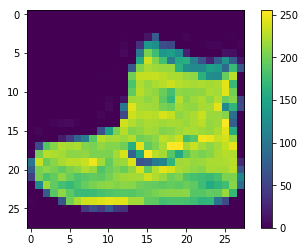

In [81]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [82]:
train_images=train_images/255.0
test_images=test_images/255.0

SyntaxError: unexpected EOF while parsing (<ipython-input-83-e663e624a246>, line 2)

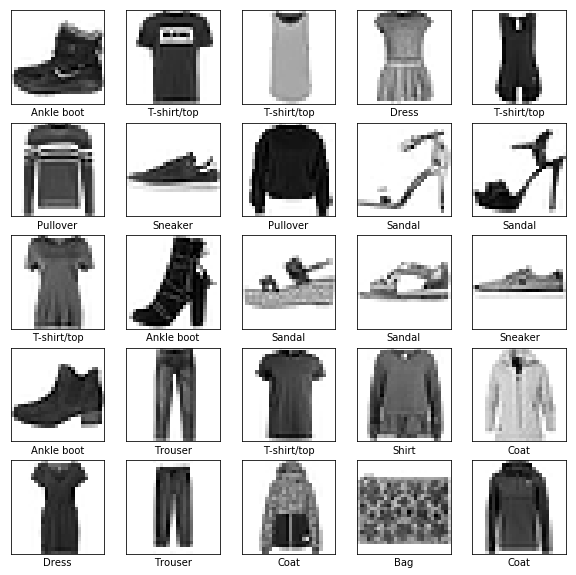

In [84]:

plt.figure(figsize=(10,10))
                    
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])

In [85]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)])


In [86]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [98]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 1.1763 - acc: 0.6629
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 1.1462 - acc: 0.6657
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 1.1186 - acc: 0.6682
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 1.0934 - acc: 0.6704
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 1.0704 - acc: 0.6733


In [88]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("test accuracy:",test_acc)

10000/10000 [==============================] - 0s 36us/step
test accuracy: 0.4861


In [89]:
prediction=model.predict(test_images)
prediction[0]

array([0.08121797, 0.04938289, 0.10814866, 0.0304252 , 0.09005562,
       0.12189791, 0.06481419, 0.13566096, 0.1014173 , 0.21697932],
      dtype=float32)

In [90]:
np.argmax(prediction[0])

9

In [91]:
test_labels[0]

9

In [92]:
def plot_image(i,predication_array,true_label,img):
    predication_array,true_label,img=predication_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predication_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predication_array),
                                         class_names[true_label],color=color))

def plot_value_array(i,prediction_array,true_label):
    prediction_array,true_label=prediction_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),prediction_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(prediction_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    


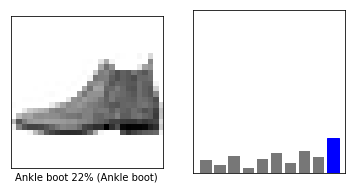

In [93]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)


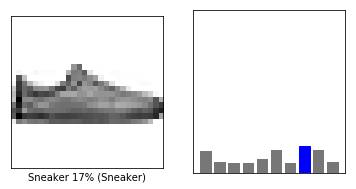

In [96]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)


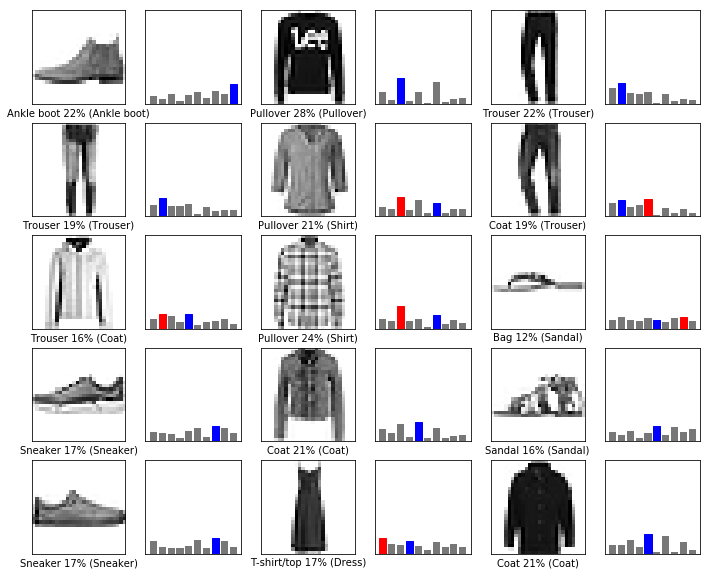

In [104]:
num_rows=5
num_col=3
num_images=num_rows*num_col
plt.figure(figsize=(2*2*num_col,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_col,2*i+1)
    plot_image(i,prediction,test_labels,test_images)
    plt.subplot(num_rows,2*num_col,2*i+2)
    plot_value_array(i,prediction,test_labels)
    

In [106]:
img=test_images[0]
img.shape

(28, 28)

In [107]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [109]:
prediction_single=model.predict(img)
print(prediction_single)

[[0.01703572 0.01056802 0.02695808 0.00662956 0.02634034 0.18875341
  0.01915488 0.20034373 0.07935403 0.42486224]]


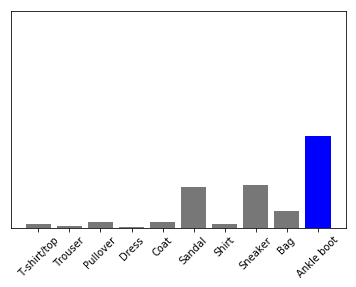

In [110]:
plot_value_array(0,prediction_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [115]:
np.argmax(prediction_single[0])


9